# To label clusters

In [1]:
# load annotation and packages needed
import sys
sys.path.append('/home/hsher/scSecretome')
from scSecretome.secM import *
from scSecretome.annot import *
from scSecretome.de import *
import scanpy as sc

# read processed, filtered, normalized single cell data.
pellin_cd34 = sc.read('/home/hsher/processed_single_cell_data/pellin_cd34.h5ad')
pellin_lin = sc.read('/home/hsher/processed_single_cell_data/pellin_lin.h5ad')

wolock = sc.read('/home/hsher/processed_single_cell_data/wolock_mapped.h5ad')
tik = sc.read('/home/hsher/processed_single_cell_data/tikhonova_mapped.h5ad')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
# bridge to seurat
#from scipy.sparse import csr_matrix
#pellin_lin.obs_names_make_unique()

#pellin_lin.var_names_make_unique()
#pellin_lin.X = csr_matrix(pellin_lin.X)

#pellin_lin.obs['cell.names'] = pellin_lin.obs['louvain_anno']
#pellin_lin.write_loom('/home/hsher/processed_single_cell_data/pellin_lin_sparse.loom', write_obsm_varm=True)

# Differential expressed gene to label cluster

In [3]:
def marker_to_dict(marker_df):
    marker_dict = {}
    for name, group in marker_df.groupby(by = 'Lineage'):
        marker_dict[name] = set(group['Gene Symbol'])
    return(marker_dict)

hema_marker = read_haemapedia()
hema_dict = marker_to_dict(hema_marker)
niche_marker = niche_specific_genes()
niche_marker['Gene Symbol'] = niche_marker['Gene Symbol'].str.upper() # due to human homolog, a very rough way
niche_dict = marker_to_dict(niche_marker)

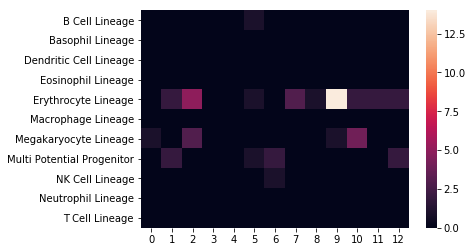

In [4]:
import seaborn as sns
sc.tl.rank_genes_groups(pellin_cd34, groupby = 'louvain')
cd34_marker = sc.tl.marker_gene_overlap(pellin_cd34, hema_dict)
sns.heatmap(cd34_marker)

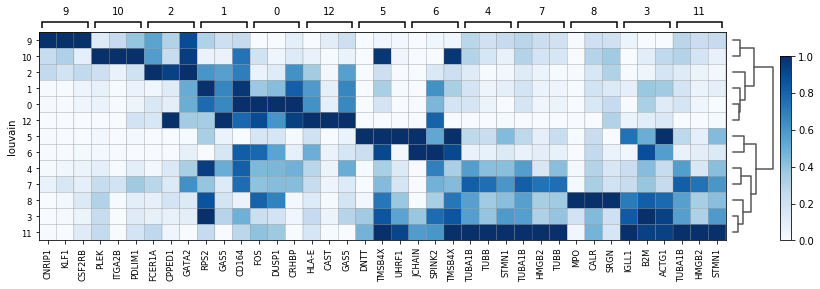

In [5]:
axs = sc.pl.rank_genes_groups_matrixplot(pellin_cd34, n_genes=3, standard_scale='var', cmap='Blues')

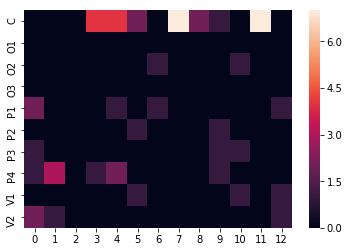

In [6]:
cd34_marker = sc.tl.marker_gene_overlap(pellin_cd34, niche_dict)
sns.heatmap(cd34_marker)

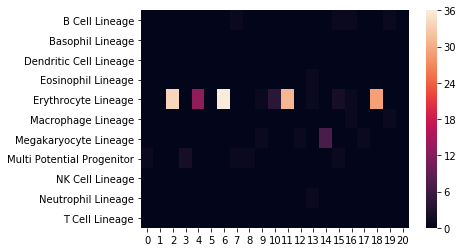

In [7]:
sc.tl.rank_genes_groups(pellin_lin, groupby = 'louvain')
lin_marker = sc.tl.marker_gene_overlap(pellin_lin, hema_dict)
sns.heatmap(lin_marker)

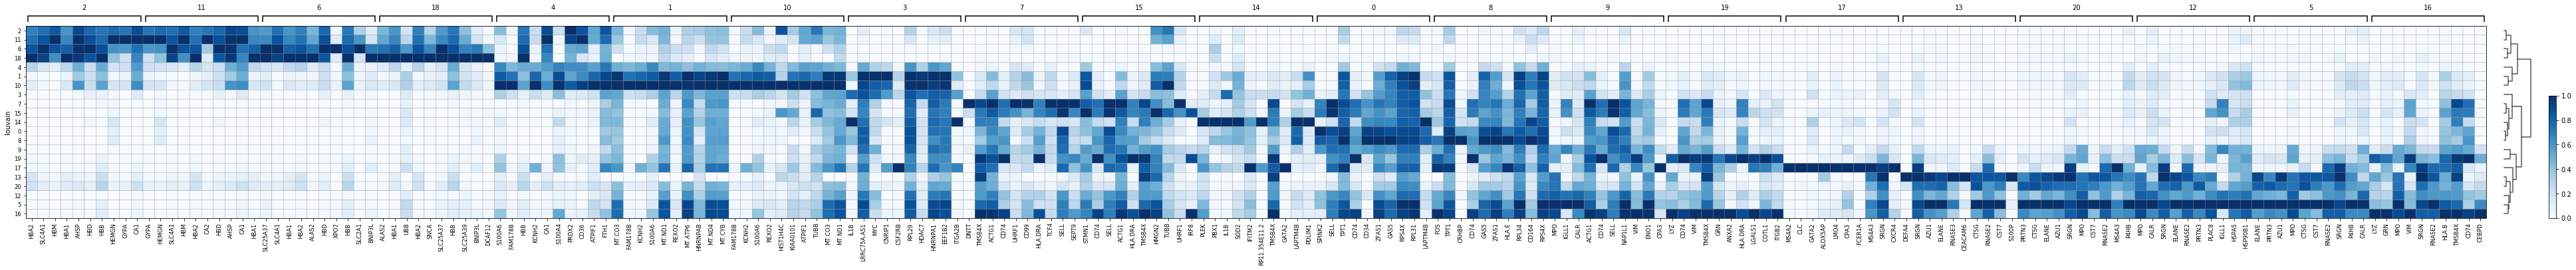

In [8]:
axs = sc.pl.rank_genes_groups_matrixplot(pellin_lin, standard_scale='var', cmap='Blues')

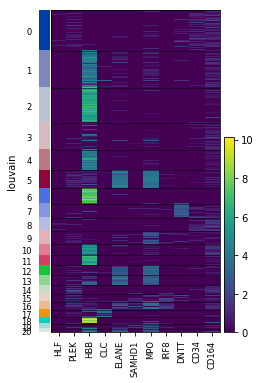

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 3.3, 0, 0.2])

In [9]:
sc.pl.heatmap(pellin_lin, pellin_lineage()['Gene Symbol'].tolist(), groupby='louvain')

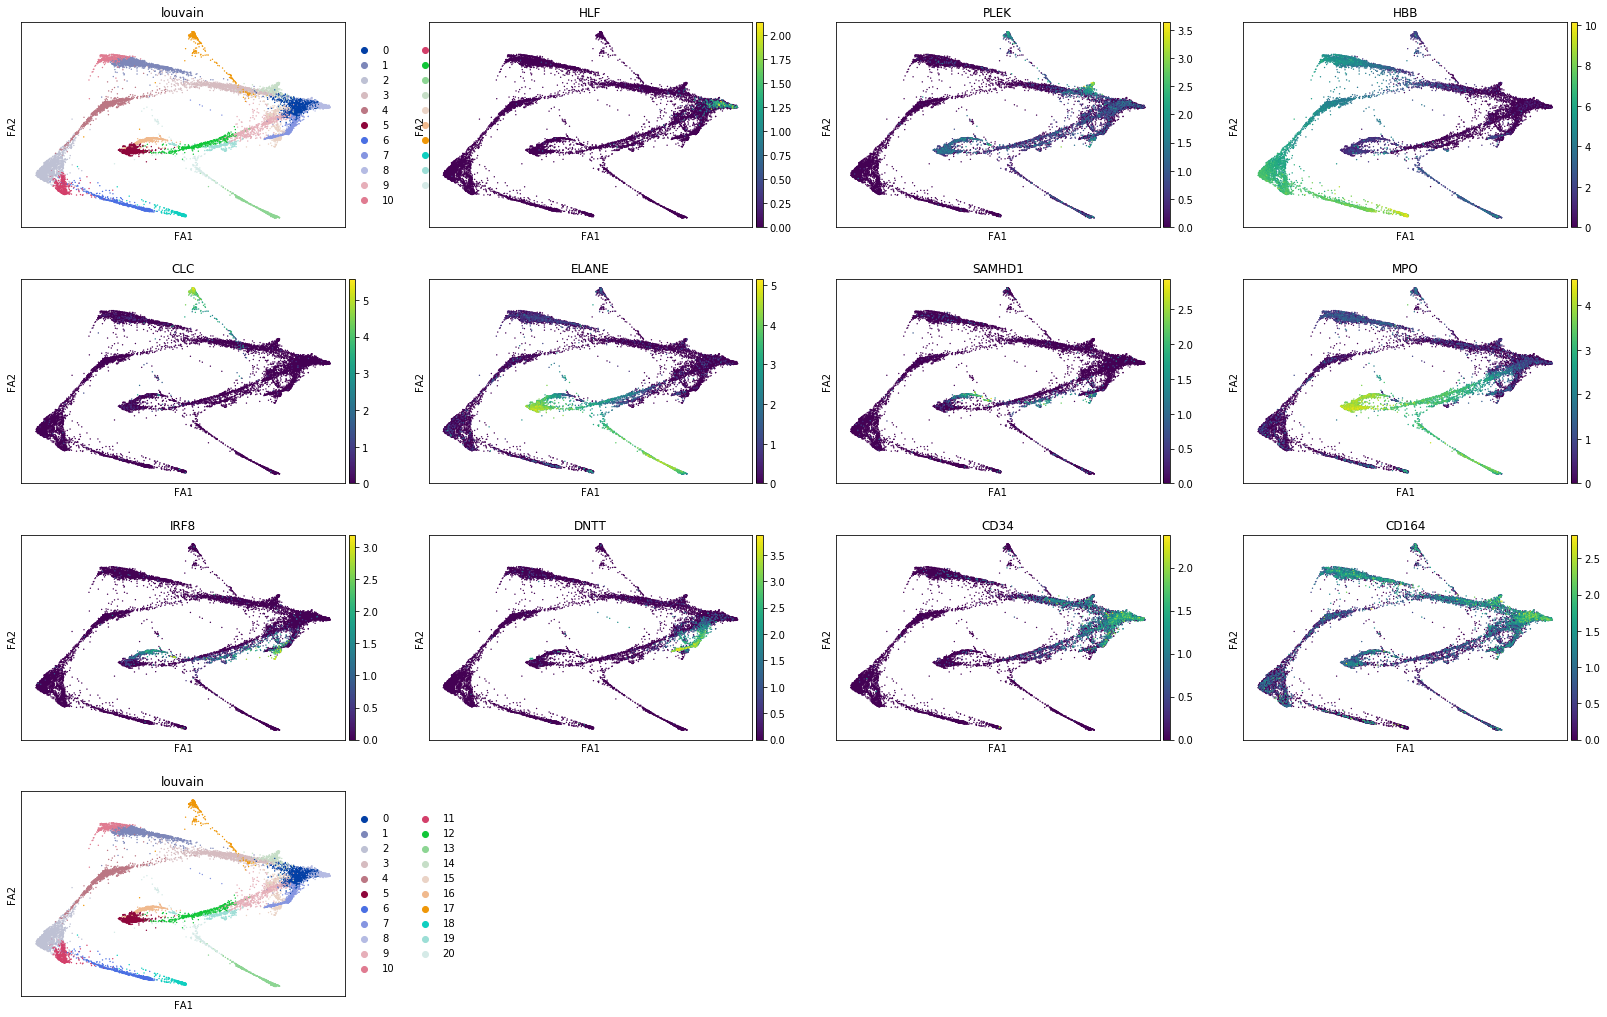

In [10]:
sc.pl.draw_graph(pellin_lin, color=['louvain'] + pellin_lineage()['Gene Symbol'].tolist()+['louvain'])

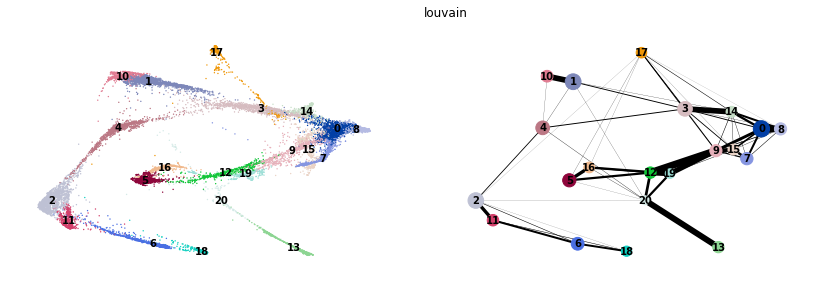

In [11]:
sc.pl.paga_compare(pellin_lin)

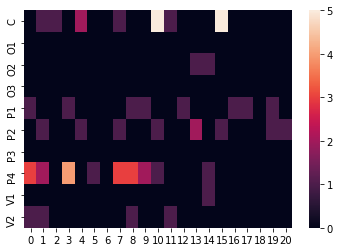

In [12]:
lin_marker = sc.tl.marker_gene_overlap(pellin_lin, niche_dict)
sns.heatmap(lin_marker)

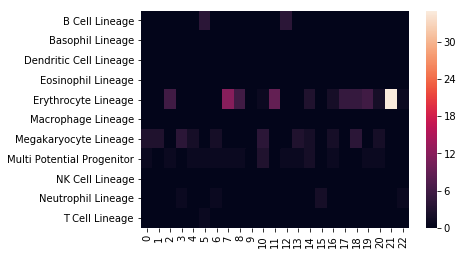

In [13]:
sc.tl.rank_genes_groups(wolock, groupby = 'louvain')
wo_marker = sc.tl.marker_gene_overlap(wolock, hema_dict)
sns.heatmap(wo_marker)


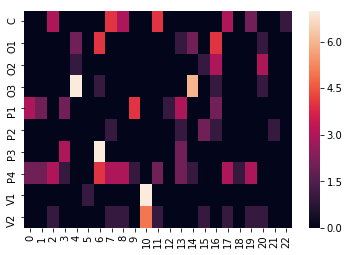

In [14]:
wo_marker = sc.tl.marker_gene_overlap(wolock, niche_dict)
sns.heatmap(wo_marker)

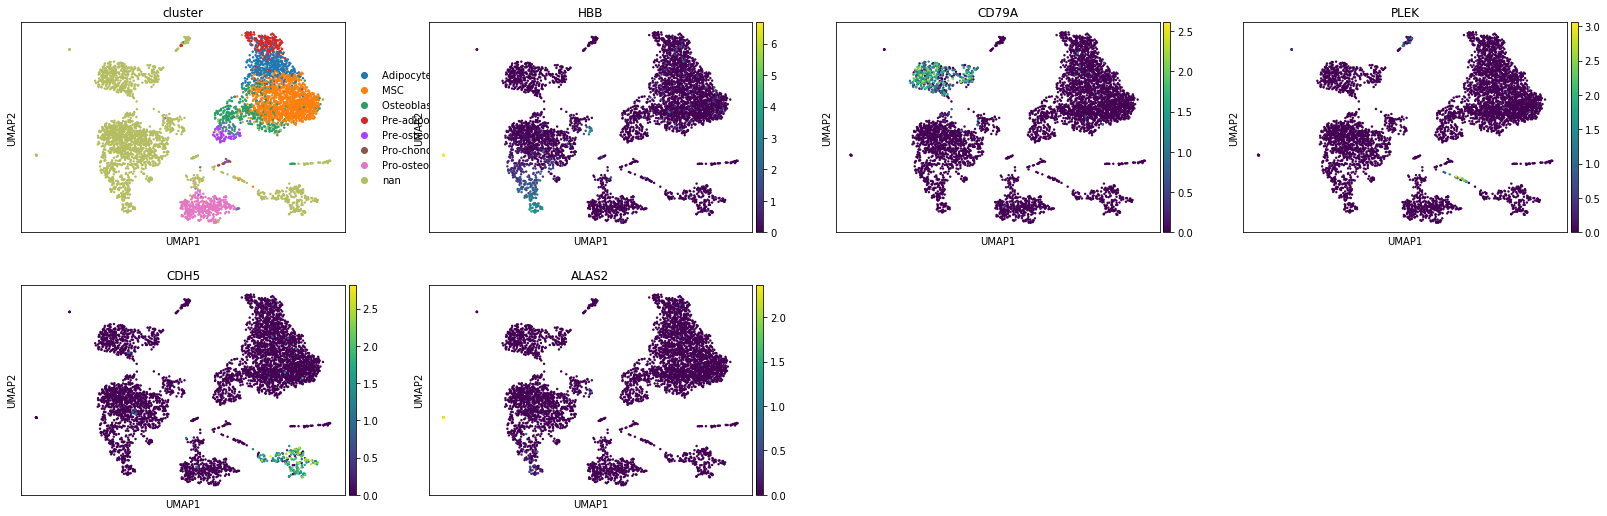

In [15]:
sc.pl.umap(wolock, color=['cluster', 'HBB', 'CD79A', 'PLEK', 'CDH5','ALAS2'])

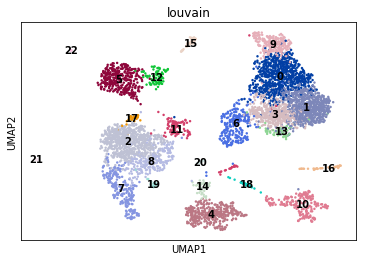

In [16]:
sc.pl.umap(wolock, color = 'louvain', legend_loc = 'on data')

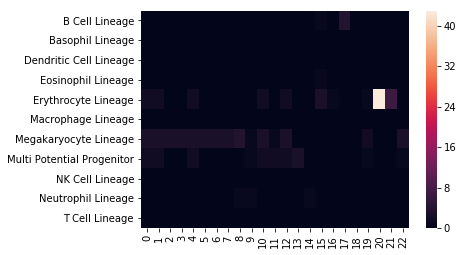

In [17]:
sc.tl.rank_genes_groups(tik, groupby = 'louvain')
tik_marker = sc.tl.marker_gene_overlap(tik, hema_dict)
sns.heatmap(tik_marker)


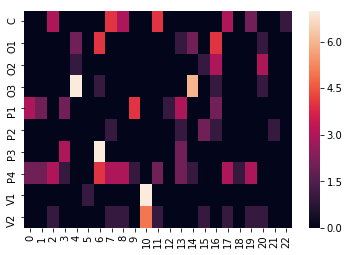

In [18]:
sc.tl.rank_genes_groups(wolock, groupby = 'louvain')
tik_marker = sc.tl.marker_gene_overlap(wolock, niche_dict)
sns.heatmap(tik_marker)

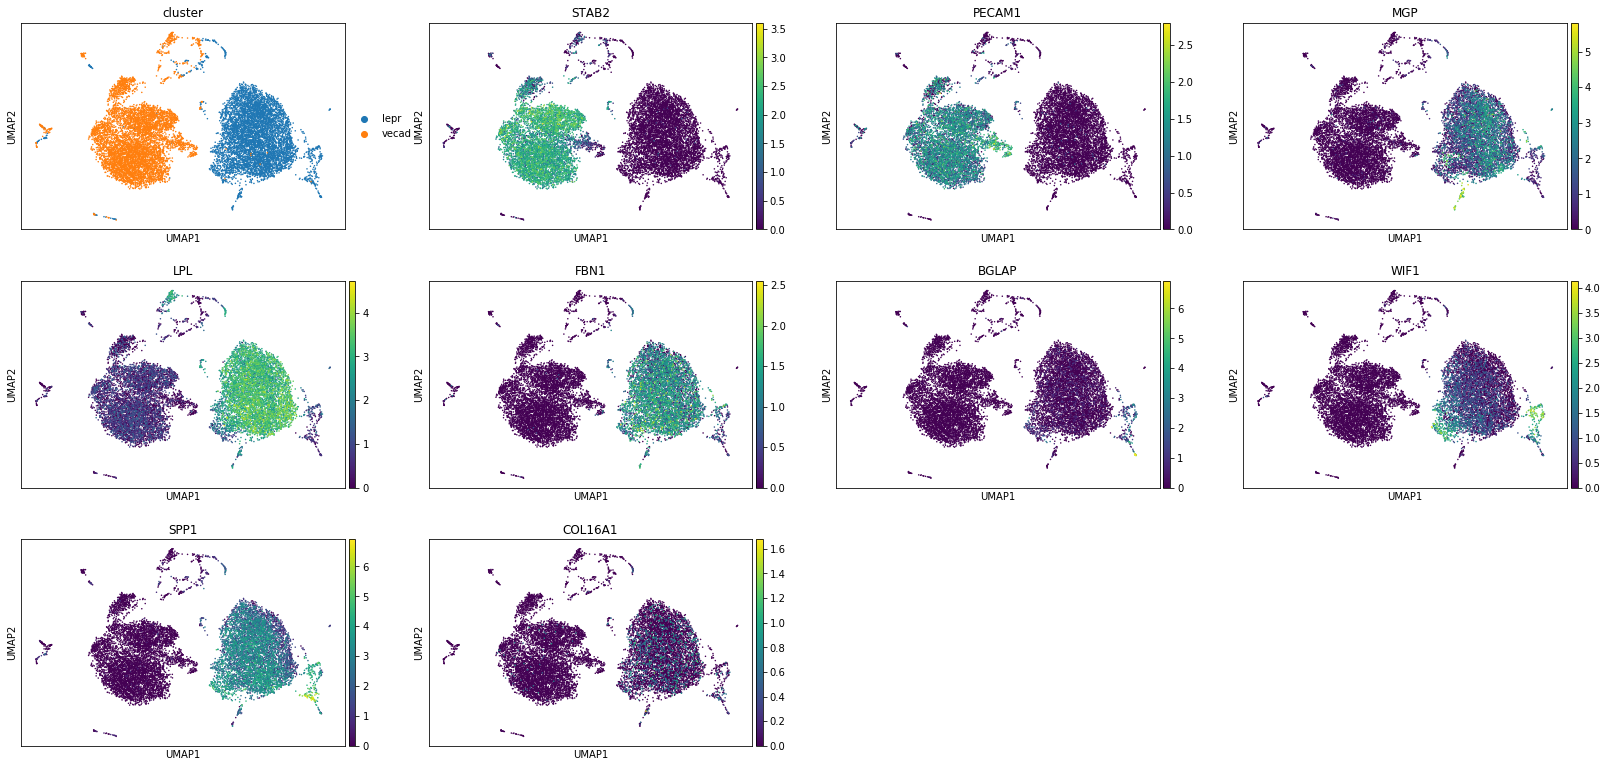

In [19]:
to_human = list(set([b.upper() for b in bary_lineage()['Gene Symbol'].tolist()]).intersection(tik.var_names))

sc.pl.umap(tik, color=['cluster', 'STAB2','PECAM1', 'MGP', 'LPL', 'FBN1','BGLAP','WIF1','SPP1', 'COL16A1'])

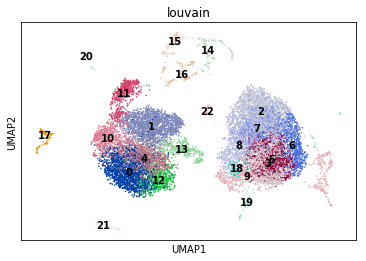

In [20]:
sc.pl.umap(tik, color = 'louvain', legend_loc = 'on data')

# Overlap with FACs group or original publication label

In [21]:
pellin_cd34.obs.groupby(by = 'louvain')['cluster'].value_counts().unstack()

cluster,CMP,GMP,HSC,MEP,MLP,MPP,PreBNK
louvain,,,,,,,
0,311.0,4.0,883.0,136.0,1.0,128.0,7.0
1,670.0,25.0,164.0,25.0,3.0,25.0,12.0
2,71.0,1.0,126.0,609.0,NaN,52.0,5.0
3,11.0,483.0,2.0,NaN,15.0,NaN,NaN
4,301.0,50.0,73.0,19.0,2.0,3.0,3.0
5,NaN,99.0,NaN,NaN,NaN,NaN,324.0
6,8.0,29.0,1.0,NaN,98.0,NaN,217.0
7,162.0,15.0,24.0,62.0,NaN,2.0,NaN
8,27.0,214.0,3.0,2.0,2.0,NaN,NaN


In [22]:
pellin_lin.obs.groupby(by = 'louvain')['cluster'].value_counts().unstack()

cluster,Lin- CD34+ CD164+,Lin- CD34- CD164high,Lin- CD34- CD164low,Lin- CD34low CD164high
louvain,,,,
0,1960.0,2.0,2.0,4.0
1,10.0,NaN,NaN,1735.0
2,1.0,1653.0,8.0,9.0
3,1176.0,27.0,4.0,78.0
4,18.0,887.0,54.0,29.0
5,NaN,NaN,NaN,856.0
6,NaN,737.0,NaN,13.0
7,483.0,1.0,NaN,170.0
8,629.0,NaN,NaN,NaN


In [23]:
wolock.obs.groupby(by = 'louvain')['cluster'].value_counts().unstack()

cluster,Adipocyte progenitor,MSC,Osteoblast progenitor,Pre-adipocyte,Pre-osteoblast/chondrocyte,Pro-chondrocyte,Pro-osteoblast,nan
louvain,,,,,,,,
0,395.0,271.0,50.0,31.0,NaN,NaN,NaN,13.0
1,7.0,703.0,37.0,NaN,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715.0
3,2.0,328.0,124.0,NaN,2.0,NaN,NaN,9.0
4,NaN,2.0,3.0,NaN,8.0,NaN,342.0,10.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.0
6,8.0,3.0,146.0,NaN,77.0,3.0,NaN,19.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0


In [24]:
tik.obs.groupby(by = 'louvain')['cluster'].value_counts().unstack()

cluster,lepr,vecad
louvain,,
0,NaN,1648.0
1,10.0,1612.0
2,1453.0,NaN
3,1079.0,2.0
4,NaN,1001.0
5,808.0,1.0
6,807.0,NaN
7,752.0,NaN
8,692.0,1.0


# Hand Annotation

In [25]:
import pandas as pd
def read_hand_anno(file):
    '''
    read hand annotation data!
    '''
    d = pd.read_excel(file, index_col = 0)
    # has to be string
    d.index = d.index.astype(str)
    return(d)

In [26]:
pellin_lin_anno = read_hand_anno('/home/hsher/c2c_input/pellin_lin_metadata_1211.xlsx')

In [27]:
lin_dict = pellin_lin_anno['Louvain_annotation'].to_dict()

In [28]:
pellin_lin.obs['louvain_anno'] = pellin_lin.obs['louvain'].map(pellin_lin_anno['Louvain_annotation'])

... storing 'louvain_anno' as categorical


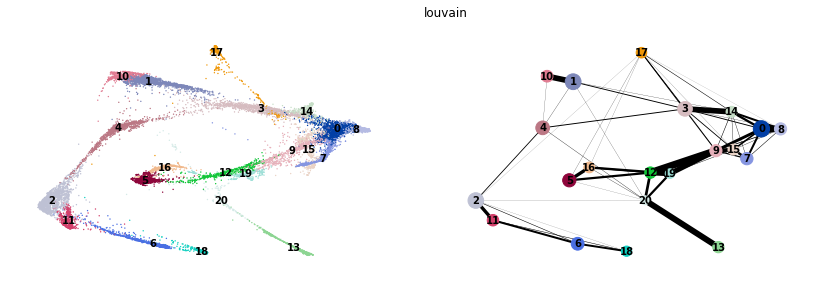

In [29]:
sc.pl.paga_compare(pellin_lin, labels = lin_dict)

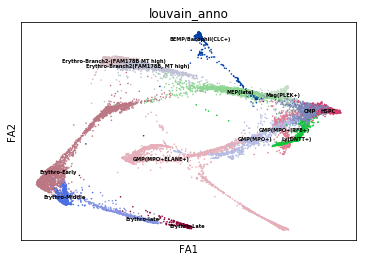

In [30]:
sc.pl.draw_graph(pellin_lin, color = 'louvain_anno', legend_loc='on data', legend_fontsize = 5, size = (10,10), save = 'pellin_lin.pdf')

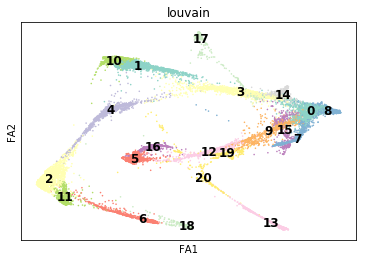

In [31]:
sc.pl.draw_graph(pellin_lin, color = 'louvain', legend_loc='on data', legend_fontsize = 12, size = (10,10), palette = 'Set3')

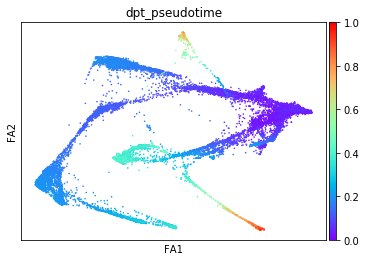

In [32]:
sc.pl.draw_graph(pellin_lin, color = 'dpt_pseudotime', legend_loc='on data', legend_fontsize = 12, size = (10,10), color_map = 'rainbow', save = 'pellinlindpt_pseudotime')

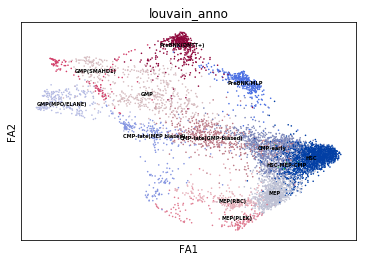

In [33]:
pellin_cd34_anno = read_hand_anno('/home/hsher/c2c_input/pellin_cd34_metadata_1211.xlsx')
pellin_cd34.obs['louvain_anno'] = pellin_cd34.obs['louvain'].map(pellin_cd34_anno['Louvain_annotation'])
sc.pl.draw_graph(pellin_cd34, color = 'louvain_anno', legend_loc='on data', legend_fontsize = 5, size = (10,10), save = 'pellin_cd34.pdf')

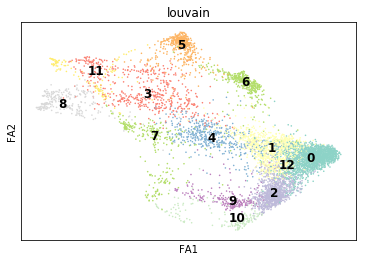

In [34]:
sc.pl.draw_graph(pellin_cd34, color = 'louvain', legend_loc='on data', legend_fontsize = 12, size = (10,10), palette = 'Set3')

... storing 'louvain_anno' as categorical


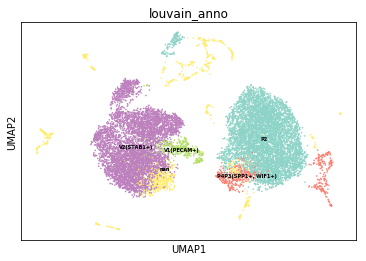

In [35]:
import matplotlib as mpl
tik_anno = read_hand_anno('/home/hsher/c2c_input/tikhonova_metadata_1211.xlsx')
tik.obs['louvain_anno'] = tik.obs['louvain'].map(tik_anno['Louvain_annotation'])
sc.pl.umap(tik, color = 'louvain_anno', legend_loc='on data', legend_fontsize = 5, size = (10,10), save = 'tik.pdf', palette = 'Set3')

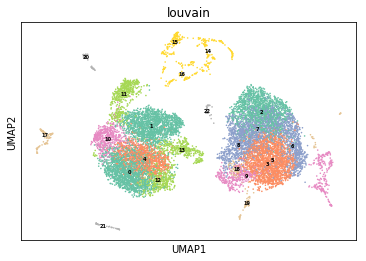

In [36]:
sc.pl.umap(tik, color = 'louvain', legend_loc='on data', legend_fontsize = 5, size = (10,10), palette = 'Set2')

... storing 'louvain_anno' as categorical


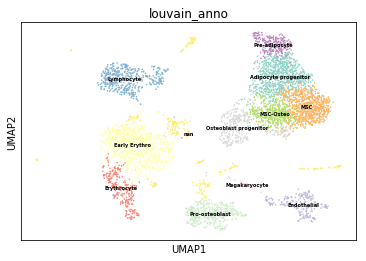

In [37]:
wo_anno = read_hand_anno('/home/hsher/c2c_input/wolock_metadata_1122.xlsx')
wolock.obs['louvain_anno'] = wolock.obs['louvain'].map(wo_anno['Louvain_annotation'])
sc.pl.umap(wolock, color = 'louvain_anno', legend_loc='on data', legend_fontsize = 5, size = (10,10), save = 'wo.pdf', palette = 'Set3')

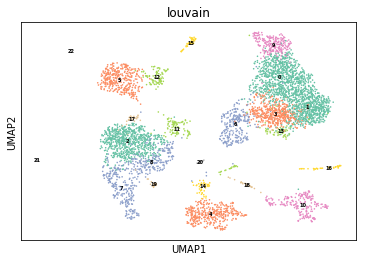

In [38]:
sc.pl.umap(wolock, color = 'louvain', legend_loc='on data', legend_fontsize = 5, size = (10,10), palette = 'Set2', save = 'wo_no')

# Write to file

In [44]:
pellin_lin.write('/home/hsher/processed_single_cell_data/pellin_lin_labelled.h5ad')
pellin_cd34.write('/home/hsher/processed_single_cell_data/pellin_cd34_labelled.h5ad')

In [42]:
wolock.write('/home/hsher/processed_single_cell_data/wolock_labelled.h5ad')
tik.write('/home/hsher/processed_single_cell_data/tik_labelled.h5ad')
